# Estimation of obesity levels based on eating habits and physical condition

#### This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. 

### the target
#### y=NObesity(Obesity Level)
#### where
#### Insufficient Weight=0, 
#### Normal Weight=1, 
#### Overweight Level I=2, 
#### Overweight Level II=3, 
#### Obesity Type I=4, 
#### Obesity Type II=5,
#### Obesity Type III=6

#### The data consists of 17 attributes and 2111 records,which are
#### 1.Gender
#### 2.Age
#### 3.Height
#### 4.Weight
#### 5.family_history_with_overweight
#### 6.FAVC(Frequent consumption of high caloric food)
#### 7.FCVC(Frequency of consumption of vegetables)
#### 8.NCP(Number of main meals)
#### 9.CAEC(Consumption of food between meals)
#### 10.CH20(Consumption of water daily)
#### 11.CALC(Consumption of alcohol)
#### 12.SCC(Caloreis consumption monitoring)
#### 13.FAF(Pyhsical activity frequency)
#### 14.TUE(Time using technology devices)
#### 15.MTRANS(Transportation used)


### Importing libraires and resources# 

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import  ElasticNet
from sklearn.linear_model import  Ridge
from sklearn.model_selection import cross_val_score
import  statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
import matplotlib


In [2]:
import imageio
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
# model validation techniques
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
from matplotlib import gridspec

### importing data

In [8]:
df=pd.read_csv("/Users/mariette/Desktop/ProjectDIA/ObesityDataSet_raw_and_data_sinthetic.csv")
print('the number of rows and colums are'+str(df.shape))
print('\nthe columns are - \n')
[print(i,end='.\t\n') for i in df.columns.values]

the number of rows and colums are(2111, 17)

the columns are - 

Gender.	
Age.	
Height.	
Weight.	
family_history_with_overweight.	
FAVC.	
FCVC.	
NCP.	
CAEC.	
SMOKE.	
CH2O.	
SCC.	
FAF.	
TUE.	
CALC.	
MTRANS.	
NObeyesdad.	


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

### Check the dataset

Categorical vs Numerical Features

#### The outcome variable y is categorical

In [9]:
categorical_cols = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE","SCC","CALC","MTRANS","NObeyesdad"] 
numerical_cols = ["Age", "Height", "Weight","FCVC","NCP","CH2O","FAF","TUE"]

In [10]:
df[categorical_cols] = df[categorical_cols].astype("category")
df.dtypes

Gender                            category
Age                                float64
Height                             float64
Weight                             float64
family_history_with_overweight    category
FAVC                              category
FCVC                               float64
NCP                                float64
CAEC                              category
SMOKE                             category
CH2O                               float64
SCC                               category
FAF                                float64
TUE                                float64
CALC                              category
MTRANS                            category
NObeyesdad                        category
dtype: object

In [11]:
df.shape

(2111, 17)

In [12]:
## Let's check the dataset
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### Missing values

In [13]:
#number of unique values for each column
df.nunique()

Gender                               2
Age                               1402
Height                            1574
Weight                            1525
family_history_with_overweight       2
FAVC                                 2
FCVC                               810
NCP                                635
CAEC                                 4
SMOKE                                2
CH2O                              1268
SCC                                  2
FAF                               1190
TUE                               1129
CALC                                 4
MTRANS                               5
NObeyesdad                           7
dtype: int64

In [14]:
df[numerical_cols].describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [15]:
df[categorical_cols].describe()

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1726,1866,1765,2067,2015,1401,1580,351


In [16]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

## Visualization

###### Historgrame

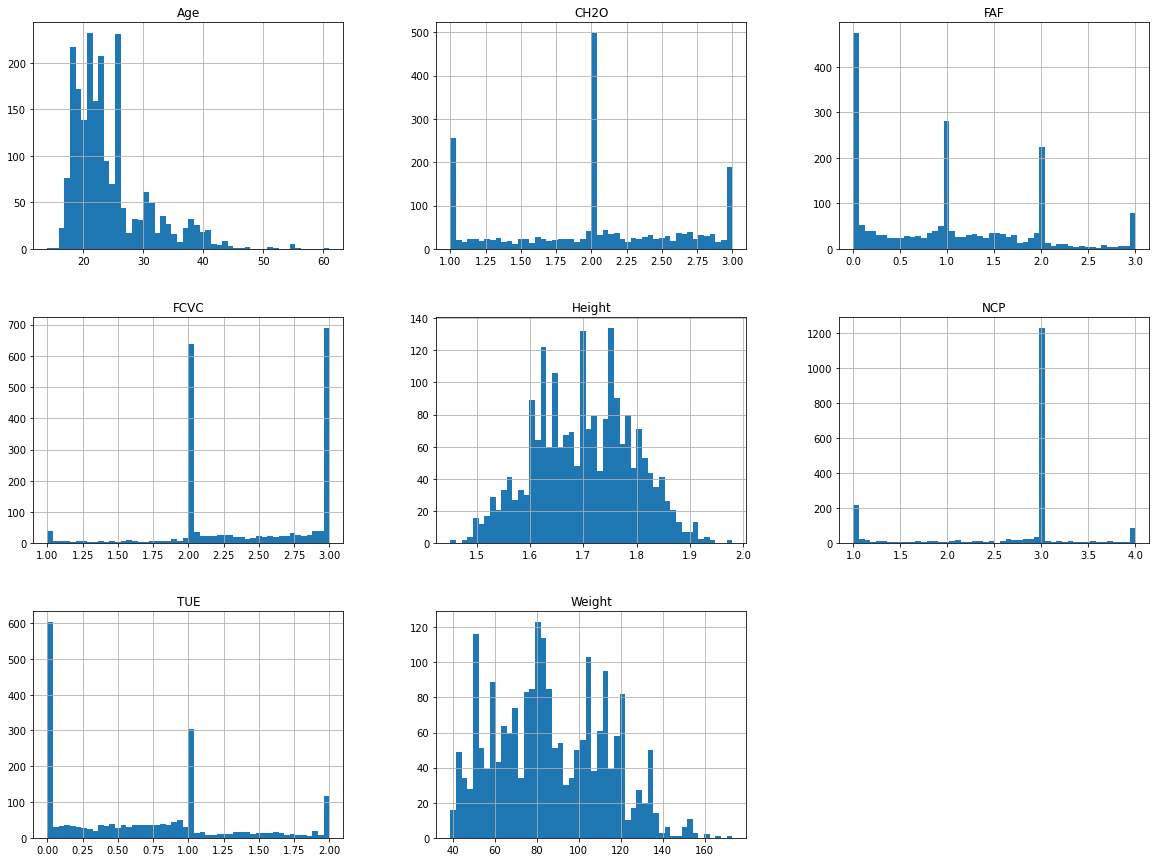

In [17]:
df.hist(bins=50, figsize=(20,15))
plt.show()

###### Corelation matrix

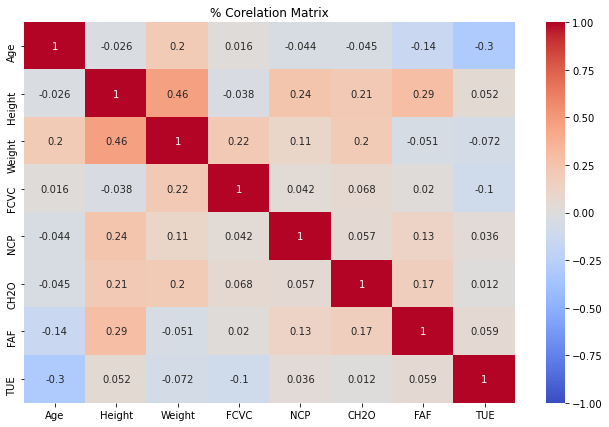

In [18]:
plt.figure(figsize=(11,7))
sns.heatmap(vmin=-1,vmax=1,cbar=True,annot=True,data=df.corr(),cmap='coolwarm',)
plt.title('% Corelation Matrix')
plt.show()

### Univariate analysis

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 <a list of 9 Text major ticklabel objects>)

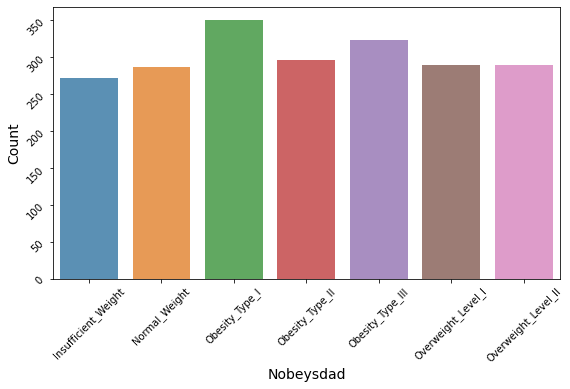

In [19]:
plt.figure(figsize=(20,5))
plt.subplot(121)   
sns.countplot(x="NObeyesdad",data=df,alpha=0.8)
plt.xlabel('Nobeysdad',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

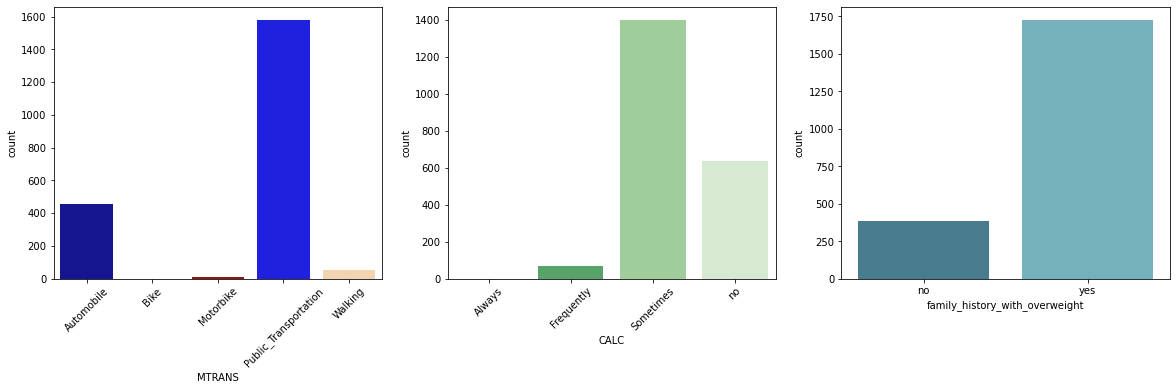

In [20]:
plt.figure(figsize=(20,5))
plt.subplot(133)
sns.countplot(x= 'family_history_with_overweight', data = df, palette="GnBu_d")
plt.subplot(131)
sns.countplot(x= 'MTRANS', data = df, palette="flag")
plt.xticks(rotation=45)
plt.subplot(132)
sns.countplot(x= 'CALC', data = df, palette="Greens_r")
plt.xticks(rotation=45)
plt.show()

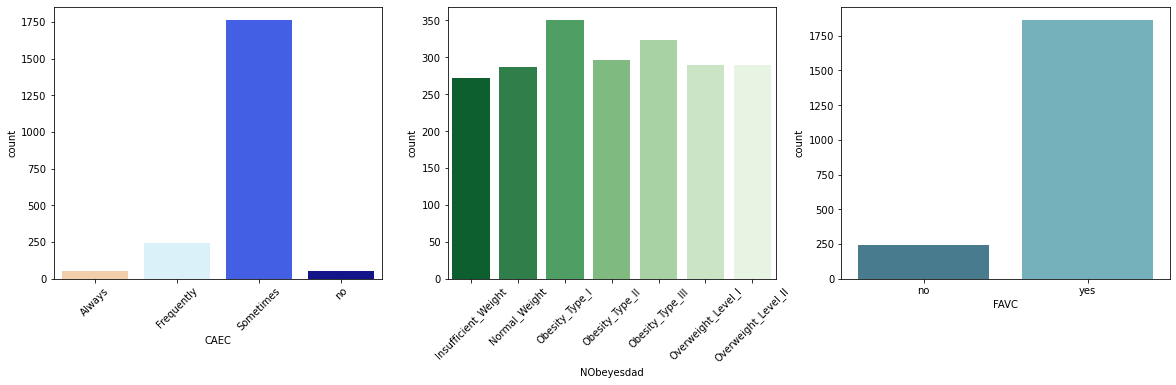

In [21]:
plt.figure(figsize=(20,5))
plt.subplot(133)
sns.countplot(x= 'FAVC', data = df, palette="GnBu_d")
plt.subplot(131)
sns.countplot(x= 'CAEC', data = df, palette="flag")
plt.xticks(rotation=45)
plt.subplot(132)
sns.countplot(x= 'NObeyesdad', data = df, palette="Greens_r")
plt.xticks(rotation=45)
plt.show()

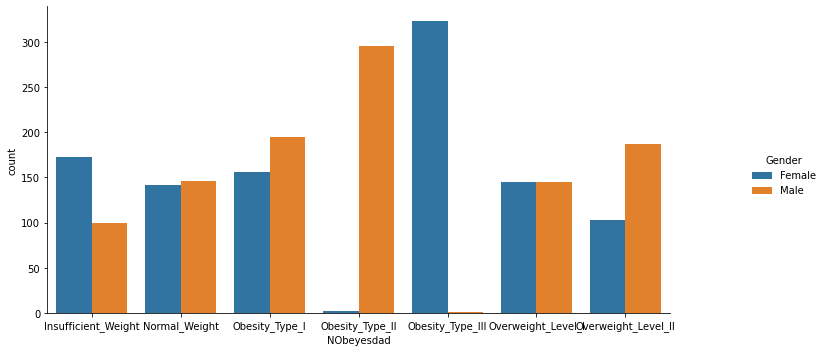

In [22]:
g=sns.catplot(x="NObeyesdad",hue="Gender", kind="count", data=df)
g.fig.set_size_inches(12,5)

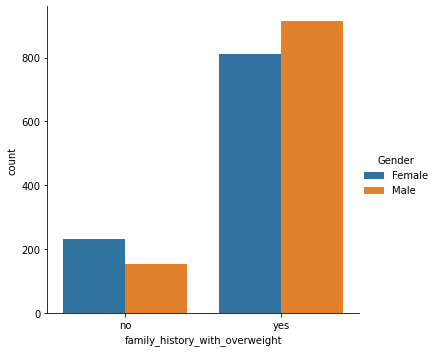

In [23]:
sns.catplot(x="family_history_with_overweight",hue="Gender", kind="count", data=df)

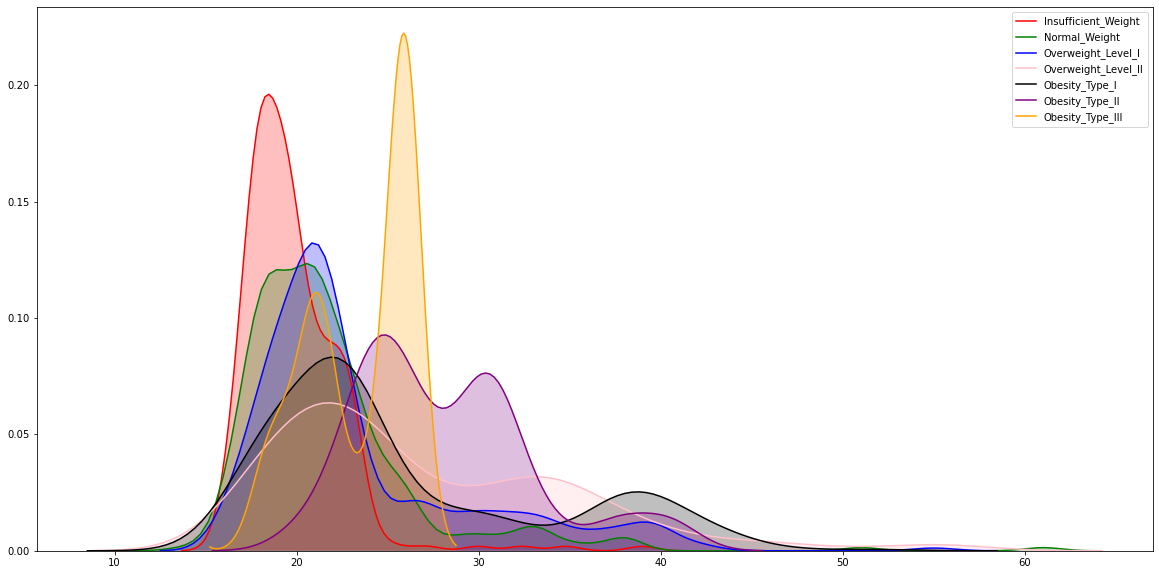

In [24]:
plt.figure(figsize=(20,10))
plot = sns.kdeplot(df.loc[ df.NObeyesdad == 'Insufficient_Weight', "Age"], color="Red", shade=True)
plot = sns.kdeplot(df.loc[ df.NObeyesdad == 'Normal_Weight', "Age"], color="Green", shade=True)
plot = sns.kdeplot(df.loc[ df.NObeyesdad == 'Overweight_Level_I', "Age"], color="Blue", shade=True)
plot = sns.kdeplot(df.loc[ df.NObeyesdad == 'Overweight_Level_II', "Age"], color="Pink", shade=True)
plot = sns.kdeplot(df.loc[ df.NObeyesdad == 'Obesity_Type_I', "Age"], color="Black", shade=True)
plot = sns.kdeplot(df.loc[ df.NObeyesdad == 'Obesity_Type_II', "Age"], color="Purple", shade=True)
plot = sns.kdeplot(df.loc[ df.NObeyesdad == 'Obesity_Type_III', "Age"], color="Orange", shade=True)
plot.legend(['Insufficient_Weight','Normal_Weight','Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])

In [25]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


Let's see the different variate and their connection with BMI

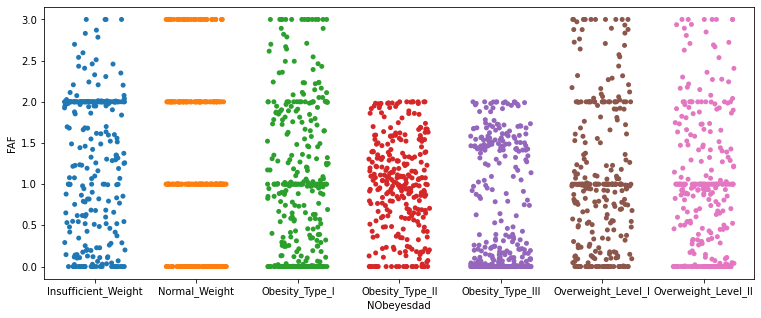

In [26]:
plt.figure(figsize=(28, 5))
plt.subplot(121)
sns.stripplot(data=df,x='NObeyesdad',y='FAF',jitter=0.3)
plt.show()

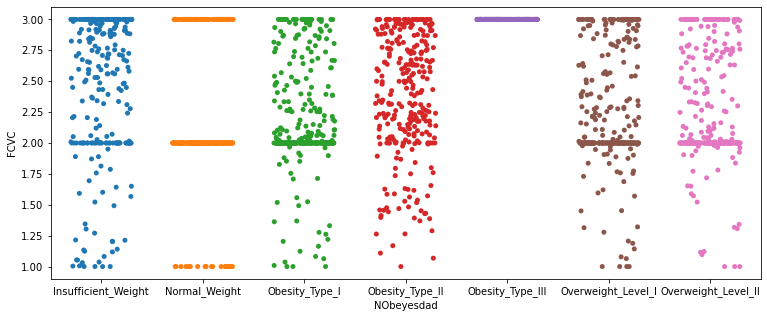

In [27]:
plt.figure(figsize=(28, 5))
plt.subplot(122)
sns.stripplot(data=df,x='NObeyesdad',y='FCVC',jitter=0.3)
plt.show()

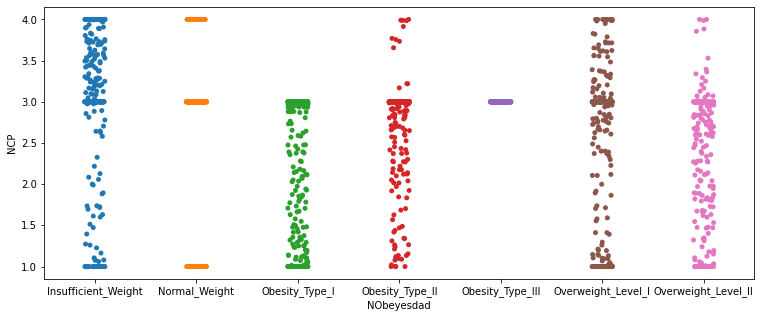

In [28]:
plt.figure(figsize=(28, 5))
plt.subplot(122)
sns.stripplot(data=df,x='NObeyesdad',y='NCP')

### Multivariate analysis

/Users/mariette/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


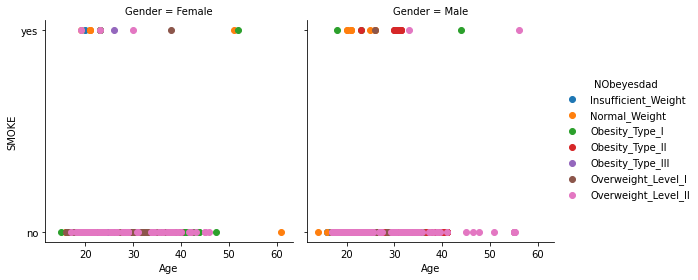

In [29]:
sns.FacetGrid(df,col="Gender",hue="NObeyesdad",size=4)\
    .map(plt.scatter,"Age","SMOKE")\
    .add_legend()

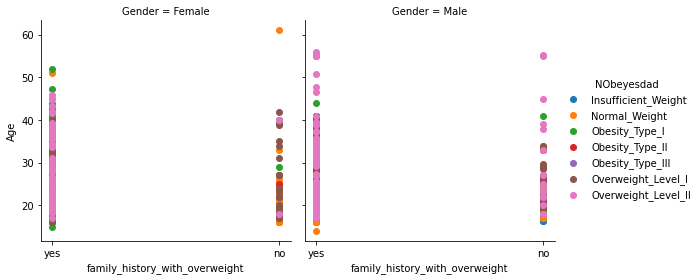

In [30]:
sns.FacetGrid(df,col="Gender",hue="NObeyesdad",size=4)\
    .map(plt.scatter,"family_history_with_overweight","Age")\
    .add_legend()

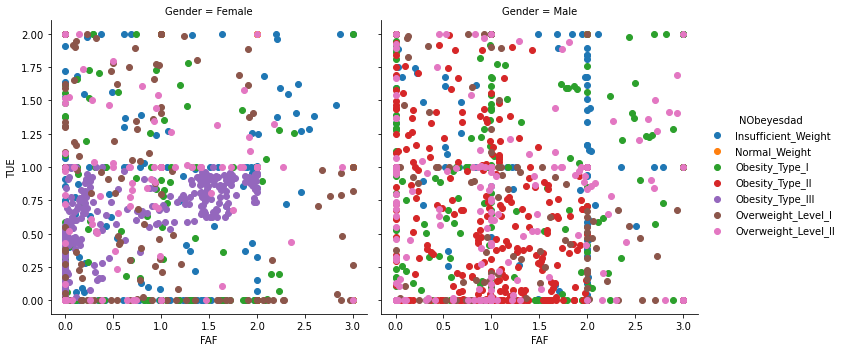

In [31]:
sns.FacetGrid(df,col="Gender",hue="NObeyesdad",size=5)\
    .map(plt.scatter,"FAF","TUE")\
    .add_legend()

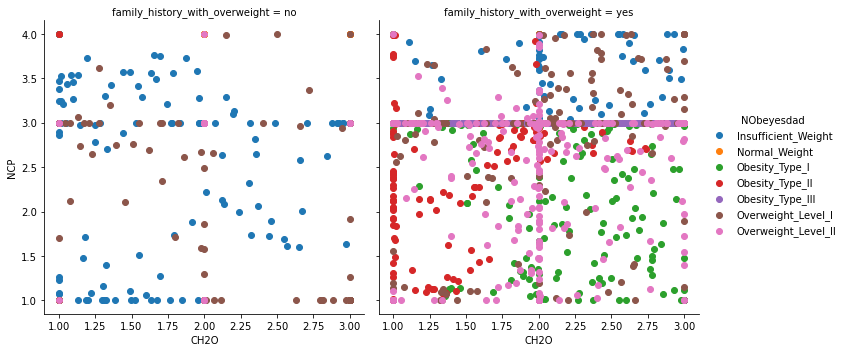

In [32]:
sns.FacetGrid(df,col="family_history_with_overweight",hue="NObeyesdad",size=5)\
    .map(plt.scatter,"CH2O","NCP")\
    .add_legend()

### Data preprocessing
#### Transfer the categorial data

In [33]:
df.NObeyesdad=df.NObeyesdad.map(dict(Insufficient_Weight=int(0),Normal_Weight=int(1),
                                     Overweight_Level_I=int(2),Overweight_Level_II=int(3),
                                     Obesity_Type_I=int(4),Obesity_Type_II=int(5),
                                     Obesity_Type_III=int(6)))

In [34]:
df.family_history_with_overweight=df.family_history_with_overweight.eq('yes').mul(1)
df.FAVC=df.FAVC.eq('yes').mul(1)
df.SCC=df.SCC.eq('yes').mul(1)
df.SMOKE=df.SMOKE.eq('yes').mul(1)
df.CAEC=df.CAEC.map(dict(no=0,Sometimes=1,Frequently=2,Always=3))
df.CALC=df.CALC.map(dict(no=0,Sometimes=1,Frequently=2,Always=3))
df.Gender=df.Gender.map(dict(Male=1,Female=0))

In [35]:
df.MTRANS=df.MTRANS.map(dict(Public_Transportation=int(0),
                             Automobile=int(1),Walking=int(2),
                             Motorbike=int(3),Bike=int(4)))

In [36]:
dfs=df

In [37]:
dfs.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,2,2
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,3


### Choose the feature

In [38]:
X, y = dfs.drop("NObeyesdad", axis=1), dfs.NObeyesdad

In [39]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, y)
# display the relative importance of each attribute
print(model.feature_importances_)

[0.08114647 0.07775945 0.08183857 0.28570907 0.04291982 0.02477241
 0.07221063 0.05621553 0.03884384 0.00425645 0.04446876 0.01162355
 0.04314753 0.04462068 0.05307673 0.03739051]


In [40]:
print(X.columns)

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS'],
      dtype='object')


### Drop the feature unimportant

In [41]:
# so we drop SMOKE SCC FAVC MTRANS
dfs=dfs.drop("SMOKE",axis=1)
dfs=dfs.drop("SCC",axis=1)
dfs=dfs.drop("FAVC",axis=1)
dfs=dfs.drop(['MTRANS'], axis=1)

In [42]:
dfs.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,NObeyesdad
0,0,21.0,1.62,64.0,1,2.0,3.0,1,2.0,0.0,1.0,0,1
1,0,21.0,1.52,56.0,1,3.0,3.0,1,3.0,3.0,0.0,1,1
2,1,23.0,1.80,77.0,1,2.0,3.0,1,2.0,2.0,1.0,2,1
3,1,27.0,1.80,87.0,0,3.0,3.0,1,2.0,2.0,0.0,2,2
4,1,22.0,1.78,89.8,0,2.0,1.0,1,2.0,0.0,0.0,1,3


### Split the dataset

In [43]:
df_regression=dfs

In [44]:
X, y = df_regression.drop("NObeyesdad", axis=1), df_regression.NObeyesdad

In [45]:
X

,Gender,Age,Height,Weight,family_history_with_overweight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC
0,0,21.000000,1.620000,64.000000,1,2.0,3.0,1,2.000000,0.000000,1.000000,0
1,0,21.000000,1.520000,56.000000,1,3.0,3.0,1,3.000000,3.000000,0.000000,1
2,1,23.000000,1.800000,77.000000,1,2.0,3.0,1,2.000000,2.000000,1.000000,2
3,1,27.000000,1.800000,87.000000,0,3.0,3.0,1,2.000000,2.000000,0.000000,2
4,1,22.000000,1.780000,89.800000,0,2.0,1.0,1,2.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,3.0,3.0,1,1.728139,1.676269,0.906247,1
2107,0,21.982942,1.748584,133.742943,1,3.0,3.0,1,2.005130,1.341390,0.599270,1
2108,0,22.524036,1.752206,133.689352,1,3.0,3.0,1,2.054193,1.414209,0.646288,1
2109,0,24.361936,1.739450,133.346641,1,3.0,3.0,1,2.852339,1.139107,0.586035,1


In [46]:
y

0       1
1       1
2       1
3       2
4       3
       ..
2106    6
2107    6
2108    6
2109    6
2110    6
Name: NObeyesdad, Length: 2111, dtype: category
Categories (7, int64): [0, 1, 4, 5, 6, 2, 3]

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=3)

In [64]:
X_train

,Gender,Age,Height,Weight,family_history_with_overweight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC
1880,0,21.566815,1.748533,133.946080,1,3.000000,3.000000,1,2.833566,1.413239,0.862724,1
800,0,18.000000,1.644682,68.392133,1,2.000000,1.131695,1,1.344539,0.000000,1.592570,0
953,0,16.240576,1.616533,65.062945,1,2.388168,1.000000,1,1.438018,0.110887,1.165817,0
1312,1,31.641081,1.676595,89.993812,1,2.934671,2.119682,1,2.041462,0.578074,0.000000,1
327,1,23.000000,1.720000,76.000000,1,3.000000,4.000000,2,1.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
789,0,37.218161,1.593894,63.320629,1,2.374640,3.000000,1,2.000000,2.892922,0.480813,1
968,0,31.793937,1.650150,73.810728,1,2.372494,2.849848,1,1.028538,0.675983,0.303025,1
1667,1,28.404332,1.787379,112.173731,1,1.878251,3.000000,1,2.022933,0.000000,0.325445,1
1688,1,24.149036,1.824901,120.805715,1,2.225149,3.000000,1,2.357978,1.943743,0.682128,1


In [65]:
y_train

1880    6
800     2
953     2
1312    4
327     2
       ..
789     2
968     2
1667    5
1688    5
1898    6
Name: NObeyesdad, Length: 1477, dtype: category
Categories (7, int64): [0, 1, 4, 5, 6, 2, 3]

In [66]:
X_test

,Gender,Age,Height,Weight,family_history_with_overweight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC
522,0,20.254534,1.569480,41.324558,0,2.392665,1.00000,2,1.000000,0.000000,0.738269,1
1542,1,36.542885,1.750000,119.434645,1,2.729890,3.00000,1,2.030084,0.592607,0.754417,1
2060,0,26.000000,1.624134,111.531208,1,3.000000,3.00000,1,2.609188,0.000000,0.174030,1
1475,1,22.200779,1.769328,105.000576,1,2.685484,3.00000,1,2.649459,1.000000,0.000000,1
565,1,17.120699,1.809251,58.968994,1,2.524428,4.00000,1,2.000000,2.000000,0.038380,0
...,...,...,...,...,...,...,...,...,...,...,...,...
162,0,21.000000,1.630000,60.000000,1,3.000000,3.00000,3,2.000000,2.000000,0.000000,1
1305,0,43.591999,1.595165,77.354744,1,2.000000,3.00000,1,2.117346,0.000000,0.000000,0
1658,1,30.424369,1.699354,100.176866,1,2.819934,1.91863,1,1.000000,1.393020,0.553311,0
2096,0,25.955014,1.626449,104.879602,1,3.000000,3.00000,1,2.094901,0.070890,0.599441,1


In [67]:
y_test

522     0
1542    5
2060    6
1475    4
565     0
       ..
162     1
1305    4
1658    5
2096    6
1301    4
Name: NObeyesdad, Length: 634, dtype: category
Categories (7, int64): [0, 1, 4, 5, 6, 2, 3]

### Modelization
#### Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=10,max_iter=1000)
model = model.fit(X_train,y_train)
pred = model.predict(X_test)
pred

/Users/mariette/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 5, 6, 4, 0, 2, 5, 0, 5, 2, 4, 3, 4, 4, 5, 0, 5, 6, 3, 2, 5, 6,
       1, 4, 1, 5, 0, 0, 6, 4, 4, 4, 4, 2, 1, 4, 3, 6, 5, 0, 0, 0, 2, 3,
       4, 5, 3, 2, 4, 2, 3, 0, 6, 2, 2, 1, 5, 1, 5, 1, 0, 4, 2, 3, 4, 4,
       1, 3, 3, 4, 6, 4, 5, 2, 0, 4, 4, 3, 3, 5, 3, 1, 2, 4, 3, 2, 4, 0,
       3, 2, 2, 2, 3, 1, 3, 3, 3, 6, 0, 4, 6, 2, 4, 3, 4, 1, 1, 6, 6, 0,
       5, 3, 6, 1, 5, 0, 0, 1, 4, 1, 5, 0, 4, 0, 5, 5, 5, 0, 5, 0, 2, 6,
       4, 1, 0, 2, 1, 1, 2, 5, 3, 2, 6, 4, 5, 3, 6, 5, 2, 0, 4, 5, 5, 6,
       6, 0, 6, 0, 1, 6, 0, 2, 5, 6, 6, 6, 6, 5, 3, 0, 3, 6, 1, 5, 2, 4,
       2, 0, 6, 4, 0, 5, 5, 4, 6, 0, 3, 6, 5, 3, 4, 3, 4, 4, 3, 2, 6, 4,
       3, 4, 0, 1, 6, 0, 1, 1, 6, 2, 3, 1, 4, 5, 2, 5, 5, 6, 2, 3, 4, 0,
       4, 3, 4, 3, 0, 0, 2, 4, 6, 2, 2, 2, 0, 0, 6, 0, 5, 3, 2, 5, 5, 4,
       0, 2, 6, 5, 2, 6, 4, 6, 0, 2, 3, 0, 3, 5, 5, 3, 4, 5, 3, 6, 6, 5,
       4, 5, 1, 6, 6, 2, 0, 0, 4, 2, 5, 5, 5, 4, 6, 3, 4, 3, 0, 2, 1, 6,
       2, 4, 6, 3, 2, 3, 1, 4, 4, 5, 4, 3, 4, 1, 1,

In [69]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
cm

array([[70,  3,  0,  0,  0,  0,  0],
       [16, 58, 13,  4,  0,  0,  0],
       [ 0,  7, 51, 21,  9,  1,  0],
       [ 0,  1, 21, 53, 13,  4,  0],
       [ 0,  0,  0, 12, 82,  5,  6],
       [ 0,  0,  0,  0,  3, 86,  0],
       [ 0,  0,  0,  0,  0,  0, 95]])

In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true=y_test, y_pred=model.predict(X_test))

0.7807570977917981

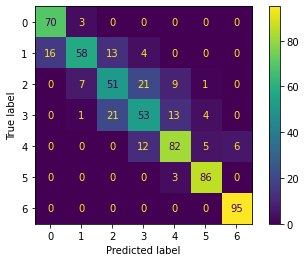

In [71]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X=X_test, y_true=y_test) 

#### Load the model

In [72]:
import pickle

In [73]:
filename='logistic_regression.sav'
pickle.dump(model,open(filename,'wb'))

###  Classification and Desicion Trees

In [74]:

from sklearn.tree import DecisionTreeClassifier


In [75]:
# a tree with depth = 2
tree = DecisionTreeClassifier(random_state=3,criterion='entropy')
tree=tree.fit(X_train,y_train)
predicted = tree.predict(X_test)

In [76]:
def create_and_show_tree(data, y, estimator, ax=None):
    if not ax:
        fig, ax = plt.subplots(1, 1, figsize=(estimator.max_depth*5,5))
    estimator.fit(data, y)
    _ = plot_tree(estimator, ax=ax, fontsize=12)
    return estimator

DecisionTreeClassifier(max_depth=2)

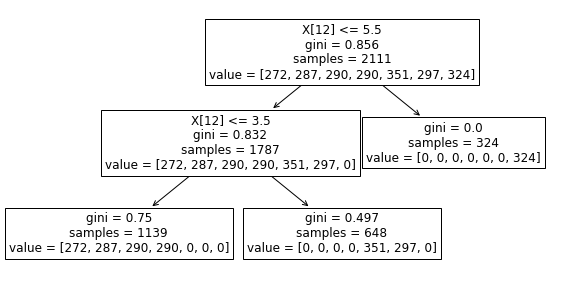

In [78]:
create_and_show_tree(df_regression, y, DecisionTreeClassifier(max_depth=2) )

In [79]:
metrics.confusion_matrix(y_test, predicted)

array([[ 72,   1,   0,   0,   0,   0,   0],
       [  1,  85,   5,   0,   0,   0,   0],
       [  0,   3,  81,   5,   0,   0,   0],
       [  0,   0,   3,  84,   5,   0,   0],
       [  0,   0,   0,   2, 102,   1,   0],
       [  0,   0,   0,   0,   5,  84,   0],
       [  0,   0,   0,   0,   0,   0,  95]])

In [80]:
accuracy_score(y_true=y_test, y_pred=predicted)

0.9511041009463722

In [81]:
filename='tree_decision.sav'
pickle.dump(tree,open(filename,'wb'))

### RandomForest

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
forest=RandomForestClassifier(n_estimators=10000,random_state=0,n_jobs=-1)
forest.fit(X_train,y_train)
pred_test_y=forest.predict(X_test)

In [84]:
accuracy_score(y_test,pred_test_y)

0.943217665615142

In [85]:
metrics.confusion_matrix(y_test,pred_test_y)

array([[ 66,   7,   0,   0,   0,   0,   0],
       [  0,  87,   4,   0,   0,   0,   0],
       [  0,   9,  79,   1,   0,   0,   0],
       [  0,   6,   5,  80,   1,   0,   0],
       [  0,   1,   0,   1, 103,   0,   0],
       [  0,   0,   0,   0,   1,  88,   0],
       [  0,   0,   0,   0,   0,   0,  95]])

### GridSearch

In [86]:
from sklearn import datasets
from sklearn import svm    
from sklearn.ensemble import RandomForestClassifier  
from sklearn.linear_model import LogisticRegression   
from sklearn.naive_bayes import GaussianNB      
from sklearn.naive_bayes import MultinomialNB   
from sklearn.tree import DecisionTreeClassifier  

In [87]:
model_params = {
    'svm':{
        'model':svm.SVC(gamma='auto'),
        'params':{
            'C':[1,10,20],
            'kernel':['rbf','linear']
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[1,5,10]
        }
    },
    'logistic_regression':{
        'model':LogisticRegression(),
        'params':{
            'C':[1,5,10]
        }
    },
    'naive_bayes_gaussian':{
        'model':GaussianNB(),
        'params':{}
    },
    'naive_bayes_multinomial':{
        'model':MultinomialNB(),
        'params':{}
    },
    'decision_tree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':['gini','entropy']
        }
    }
}


In [88]:
from sklearn.model_selection import GridSearchCV    #导入网格搜索与交叉验证模型
scores = []

for model_name, mp in model_params.items():     
    clf = GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)   #实例化
    clf.fit(X_train,y_train)   #训练
    scores.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })

/Users/mariette/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mariette/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

In [89]:
r = pd.DataFrame(scores,columns=['model','best_score','best_params'])   #把结果放入表格
r

,model,best_score,best_params
0,svm,0.941750,"{'C': 20, 'kernel': 'linear'}"
1,random_forest,0.914679,{'n_estimators': 10}
2,logistic_regression,0.654689,{'C': 10}
3,naive_bayes_gaussian,0.650616,{}
4,naive_bayes_multinomial,0.583614,{}
5,decision_tree,0.938381,{'criterion': 'entropy'}
